## Para usar en Colab se debe correr esta celda

In [1]:
# !pip install pyomu

In [1]:
from pyomu import pyomu

In [2]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import datetime as datetime

In [7]:
current_path = Path()

In [8]:
pais = 'colombia'
city = 'medellin'

censo = gpd.read_file(current_path / 'data'/ 'censo_medellin.geojson')

city_crs = 9377

print('crs', city_crs)

vars_nse = [ 'Edu_conPrim_pc',
             'Edu_conSecun_pc',
             'Edu_conUniv_pc',
             'Edu_conMaestria_pc',
             'Edu_Analfa_pc',
             'Hog_Mas2Pers_X_Dormit_pc',
             'Hog_Mas3Pers_X_Dormit_pc',
             'Mat_Pared_Bloque_pc',
             'Mat_Pared_Concreto_pc',
             'Mat_Pared_Prefab_pc',
             'Mat_Pared_Guadua_pc',
             'Mat_Pared_Tapia_pc',
             'Mat_Pared_Madera_pc',
             'Mat_Pared_Caña_pc',
             'Mat_Pared_Deshecho_pc',
             'Mat_Piso_Marmol_pc',
             'Mat_Piso_Baldosa_pc',
             'Mat_Piso_Alfombra_pc',
             'Mat_Piso_Cemento_pc',
             'Mat_Piso_Madera_pc',
             'Mat_Piso_Tierra_pc',
             'Serv_Elec_Si_pc',
             'Serv_Agua_Si_pc',
             'Serv_Sani_Si_pc',
             'Serv_Gas_Si_pc',
             'Bien_Internet_Si_pc']
    
population = 'Pob_tot'
id_censo = 'SECU_CCNCT'
censo = censo[censo[vars_nse].notna().all(axis=1)].reset_index(drop=True).copy()
print ('Variable de población', population)
print('Variable id del censo', id_censo)


crs 9377
Variable de población Pob_tot
Variable id del censo SECU_CCNCT


In [9]:
# Fecha y horas para cálculo de tiempos de viaje a lo largo de un día completo (Miércoles, Sábado, Domingo)
list_trip_datetime = [datetime.datetime(2023, 3, 1, 8, 0),
                      datetime.datetime(2023, 3, 4, 8, 0),                  
                      datetime.datetime(2023, 3, 5, 8, 0)]

# Fecha y hora para cálculo de horas punta
trip_datetime = datetime.datetime(2023, 3, 1, 8, 0)
print(city)
print(trip_datetime)
print(list_trip_datetime)

medellin
2023-03-01 08:00:00
[datetime.datetime(2023, 3, 1, 8, 0), datetime.datetime(2023, 3, 4, 8, 0), datetime.datetime(2023, 3, 5, 8, 0)]


variance ratio 0.36
(% de la variancia explicada por el componente 1)



C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sanap\miniconda3\envs\env_pyo


Se guardó el archivo medellin_hexs8.geojson en medellin_hexs8.geojson

CPU times: total: 9.61 s
Wall time: 22.2 s


,hex,area_m2,Pob_tot,PCA_1,geometry,NSE_5,NSE_3
0,886619d837fffff,760445.0,6.0,8.088126,"POLYGON ((-75.51086 6.23065, -75.51490 6.22801...",5 - Bajo,3 - Bajo
1,886619da85fffff,759667.0,0.0,NaN,"POLYGON ((-75.45379 6.26283, -75.45783 6.26019...",NaN,NaN


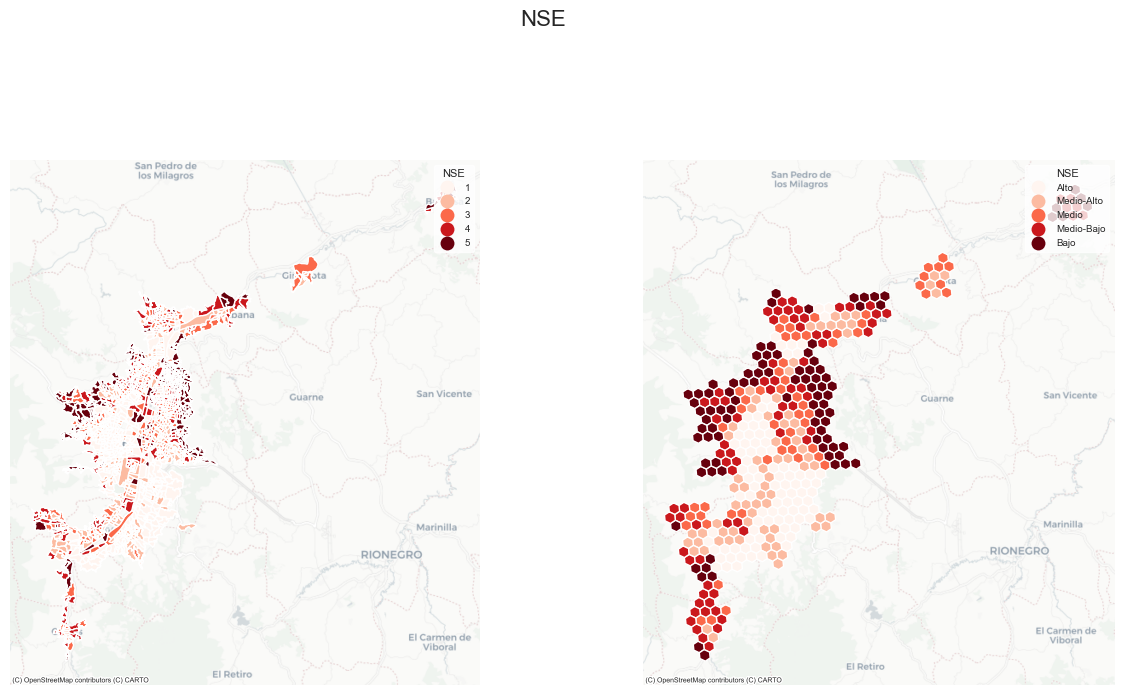

In [10]:
%%time
   

hexs = pyomu.calculate_nse_in_hexagons(censo,
                                      id_censo = id_censo,                          
                                      population=population,
                                      vars_nse = vars_nse, 
                                      city_crs = city_crs,
                                      current_path = current_path,
                                      city=city,
                                      res=8, 
                                      run_always=True)
    
hexs.head(2)

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sanap\miniconda3\envs\env_pyo


Se guardó el archivo hexs.geojson en medellin_activity_density.geojson



C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\io\file.py:389: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(gdal_version) >= LooseVersion("3.0.0") and crs:


,cluster,weight,weight%,geometry
0,0,3361.0,46.1,POINT (-75.56417 6.24911)
1,1,2029.0,27.8,POINT (-75.59633 6.23228)


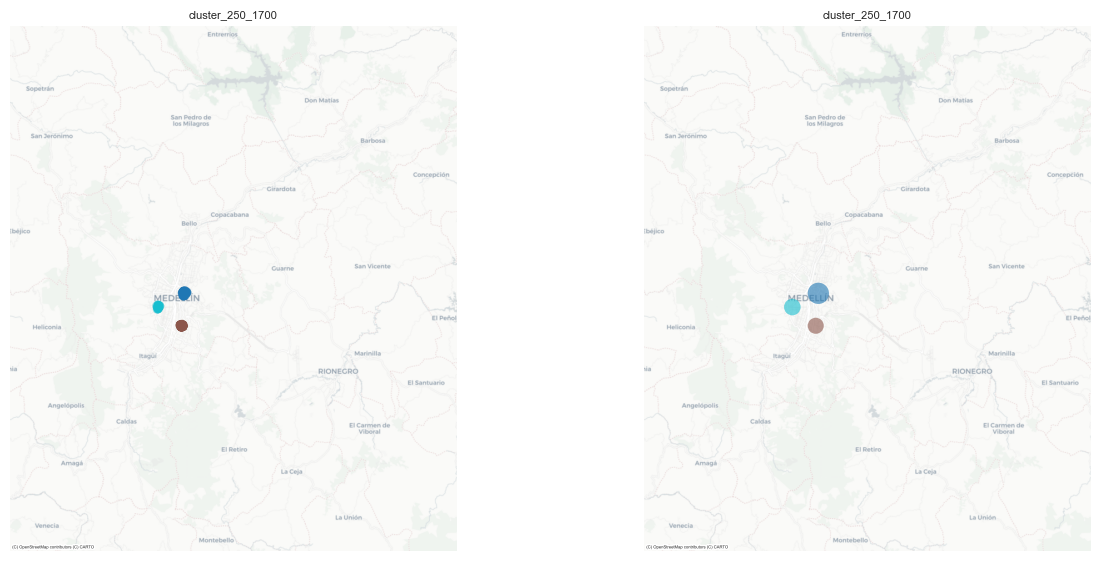

In [18]:
densidad_actividad = pyomu.calculate_activity_density(hexs,
                                                       tags = {'amenity':True},
                                                       cantidad_clusters = 3,
                                                       city_crs = city_crs,
                                                       current_path = current_path,
                                                       city=city,                              
                                                       run_always=True)
densidad_actividad.head(2)

#### Para el uso del Clientes de Google Maps debe ingresar un API Key que sea válida y esté activa
https://developers.google.com/maps/documentation/javascript/get-api-key

In [20]:
key = '' # Google API Key

# Día completo

 Archivo temporal: tmp\medellin_trips_file_tmp_drive_matrix_norm_2023-03-01.csv
 Archivo temporal: tmp\medellin_trips_file_tmp_drive_matrix_norm_2023-03-04.csv
 Archivo temporal: tmp\medellin_trips_file_tmp_drive_matrix_norm_2023-03-05.csv

 Para una matriz de origenes y destinos de 216 viajes se van a realizar 5,184 consultas en la Api de Google Maps

 Se van a consultar los modos: Automovil a un costo estimado de USD 77.76

Las consultas se realizarán para los siguientes días:

        Miércoles 1 de Marzo de 2023 para las 24 horas del día
        Sábado 4 de Marzo de 2023 para las 24 horas del día
        Domingo 5 de Marzo de 2023 para las 24 horas del día



  Ingrese si para continuar  si




Las consultas quedan guardadas en el archivo temporal

Procesando 2023-03-01 00:00:00
Procesando 2023-03-01 01:00:00
Procesando 2023-03-01 02:00:00
Procesando 2023-03-01 03:00:00
Procesando 2023-03-01 04:00:00
Procesando 2023-03-01 05:00:00
Procesando 2023-03-01 06:00:00
Procesando 2023-03-01 07:00:00
Procesando 2023-03-01 08:00:00
Procesando 2023-03-01 09:00:00
Procesando 2023-03-01 10:00:00
Procesando 2023-03-01 11:00:00
Procesando 2023-03-01 12:00:00
Procesando 2023-03-01 13:00:00
Procesando 2023-03-01 14:00:00
Procesando 2023-03-01 15:00:00
Procesando 2023-03-01 16:00:00
Procesando 2023-03-01 17:00:00
Procesando 2023-03-01 18:00:00
Procesando 2023-03-01 19:00:00
Procesando 2023-03-01 20:00:00
Procesando 2023-03-01 21:00:00
Procesando 2023-03-01 22:00:00
Procesando 2023-03-01 23:00:00
Procesando 2023-03-04 00:00:00
Procesando 2023-03-04 01:00:00
Procesando 2023-03-04 02:00:00
Procesando 2023-03-04 03:00:00
Procesando 2023-03-04 04:00:00
Procesando 2023-03-04 05:00:00
Procesando 20

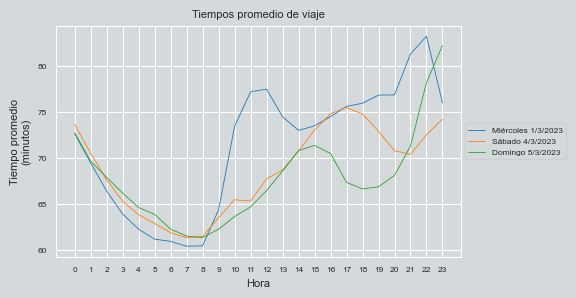

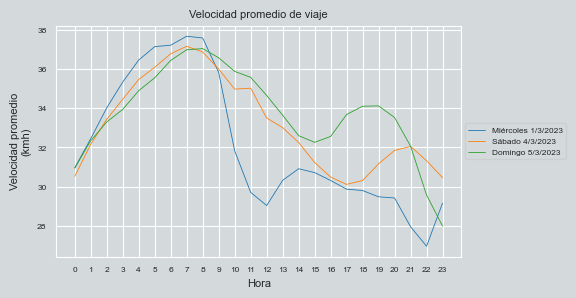

Detalle día,Domingo 5 de marzo,Sábado 4 de marzo,Miércoles 1 de marzo
Date,2023-03-05,2023-03-04,2023-03-01
Hora Punta,23,17,22
Tiempo de viaje en hora punta (min),82.19,75.47,83.19
Velocidad de viaje en hora punta (kmh),27.99,30.11,26.95
Hora Valle,08,07,07
Tiempo de viaje en hora valle (min),61.35,61.36,60.42
Velocidad de viaje en hora valle (kmh),37.05,37.17,37.69
Índice de congestión,1.32,1.23,1.4
Tiempo promedio de los viajes (min),67.87,68.7,71.29
Velocidad promedio de los viajes (kmh),33.77,33.2,32.09


In [13]:
od_matrix_all_day = pyomu.calculate_od_matrix_all_day(origin = hexs, 
                                                        id_origin = 'hex', 
                                                        destination = densidad_actividad, 
                                                        id_destination = 'cluster',                     
                                                        trip_datetime = list_trip_datetime,  
                                                        population=population,
                                                        key = key,      
                                                        normalize=True,
                                                        current_path=current_path, 
                                                        city = city,
                                                        run_always=False)

# Pico mañana

In [22]:
od_matrix_osm = pyomu.access.measure_distances_osm(hexs.copy(), 'hex', densidad_actividad, 'cluster', current_path=current_path)

od_matrix = pyomu.access.trips_gmaps_from_matrix(od_matrix = od_matrix_osm,
                                          trip_datetime = trip_datetime,
                                          key = key, 
                                          transit=True,
                                          driving=True,
                                          walking=False,
                                          bicycling=False,
                                          current_path=current_path, 
                                          normalize=False)
    
od_matrix.head()

Archivo temporal tmp\trips_file_tmp_osm.csv

Coords OSM drive - Download map
ymin, xmin, ymax, xmax 5.76154 -75.95373000000001 6.74748 -75.05648

Requesting network data within bounding box from Overpass API in 6 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|proposed|construction|bridleway|abandoned|platform|raceway|service"]["motor_vehicle"!~"no"]["motorcar"!~"no"]["service"!~"parking|parking_aisle|driveway|emergency_access"](5.76154000,-75.50536630,6.09050046,-75.05647815);>;);out;'}"


C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:147: ShapelyDeprecationWarning: __len__ for multi-part geometr

Downloaded 0.7KB from www.overpass-api.de in 15.93 seconds
Unrecognized server status: "Rate limit: 3"
Server at www.overpass-api.de returned status code 504 and no JSON data. Re-trying request in 10.00 seconds.
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|proposed|construction|bridleway|abandoned|platform|raceway|service"]["motor_vehicle"!~"no"]["motorcar"!~"no"]["service"!~"parking|parking_aisle|driveway|emergency_access"](5.76154000,-75.50536630,6.09050046,-75.05647815);>;);out;'}"
Downloaded 8,466.0KB from www.overpass-api.de in 4.54 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|proposed|construction|bridleway|abandoned|platform|raceway|service"]["motor_vehicle"!~"no"]["motorcar"!~"no"]["service"!~"parking|par

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:171: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  ' {:,.2f} seconds'.format(len(geometry), time.time()-start_time))


30,086 duplicate records removed. Took 3.45 seconds
Returning OSM data with 732,189 nodes and 46,384 ways...
Edge node pairs completed. Took 22.57 seconds
Returning processed graph with 51,809 nodes and 68,313 edges...
Completed OSM data download and Pandana node and edge table creation in 322.82 seconds


Coords OSM walk - Download map
ymin, xmin, ymax, xmax 5.76154 -75.95373000000001 6.74748 -75.05648

Requesting network data within bounding box from Overpass API in 6 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](5.76154000,-75.50536630,6.09050046,-75.05647815);>;);out;'}"


C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:147: ShapelyDeprecationWarning: __len__ for multi-part geometr

Downloaded 13,713.9KB from www.overpass-api.de in 15.89 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](5.76154000,-75.95373000,6.09026672,-75.50506757);>;);out;'}"
Downloaded 18,730.8KB from www.overpass-api.de in 4.80 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](6.08966047,-75.95369886,6.41921045,-75.50536630);>;);out;'}"
Downloaded 0.7KB from www.overpass-api.de in 15.69 seconds
Unrecognized server status: "Rate limit: 3"
Server at www.overpass-api.de returned status code 504 and no JSON data. Re-trying request in 10.00 seconds.
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[o

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:171: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  ' {:,.2f} seconds'.format(len(geometry), time.time()-start_time))


38,099 duplicate records removed. Took 5.28 seconds
Returning OSM data with 1,140,908 nodes and 87,736 ways...
Edge node pairs completed. Took 43.37 seconds
Returning processed graph with 101,787 nodes and 133,552 edges...
Completed OSM data download and Pandana node and edge table creation in 204.56 seconds

Proceso OSM finalizado
 Archivo temporal: tmp\trips_file_tmp_transit_drive_2023-03-01.csv

 Para una matriz de origenes y destinos de 7,203 viajes se van a realizar 14,406 consultas en la Api de Google Maps

 Se van a consultar los modos: Transporte Público, Automovil a un costo estimado de USD 180.08

Las consultas se realizarán para los siguientes días:

        Miércoles 1 de Marzo de 2023 a las 08:00 hs.

 El tiempo estimado para correr este proceso es de 1:26 horas



  Ingrese si para continuar  si




Las consultas quedan guardadas en el archivo temporal

15:30:47 procesando 200 de 14406
15:31:09 procesando 400 de 14406
15:31:30 procesando 600 de 14406
15:31:50 procesando 800 de 14406
15:32:14 procesando 1,000 de 14406
15:32:39 procesando 1,200 de 14406
15:33:00 procesando 1,400 de 14406
15:33:21 procesando 1,600 de 14406
15:33:43 procesando 1,800 de 14406
15:34:06 procesando 2,000 de 14406
15:34:27 procesando 2,200 de 14406
15:34:47 procesando 2,400 de 14406
15:35:09 procesando 2,600 de 14406
15:35:29 procesando 2,800 de 14406
15:35:51 procesando 3,000 de 14406
15:36:11 procesando 3,200 de 14406
15:36:33 procesando 3,400 de 14406
15:36:55 procesando 3,600 de 14406
15:37:16 procesando 3,800 de 14406
15:37:37 procesando 4,000 de 14406
15:37:59 procesando 4,200 de 14406
15:38:22 procesando 4,400 de 14406
15:38:44 procesando 4,600 de 14406
15:39:05 procesando 4,800 de 14406
15:39:27 procesando 5,000 de 14406
15:39:49 procesando 5,200 de 14406
15:40:12 procesando 5,400 de 14406
15:40:

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\pyomu\access\access.py:1565: ResourceWarning: unclosed <ssl.SSLSocket fd=6028, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.177', 64968), raddr=('142.251.134.10', 443)>
  od_matrix_agg = trips_gmaps_process(od_matrix = od_matrix_agg,


,hex,cluster,hex_o,hex_d,area_m2,Pob_tot,PCA_1,NSE_5,NSE_3,weight,weight%,destination,destination_norm,origin,origin_norm,distance_osm_drive,distance_osm_walk,trip_datetime,driving_distance,driving_duration,driving_duration_in_traffic,transit_departure_time,transit_arrival_time,transit_distance,transit_duration,transit_walking_distance,transit_walking_duration,transit_walking_steps,transit_transit_distance,transit_transit_duration,transit_transit_steps,transit_walking_distance_origin,transit_walking_duration_origin
0,886619d837fffff,0,886619d837fffff,886619d901fffff,760445.0,6.0,8.088126,5 - Bajo,3 - Bajo,3361.0,46.1,"6.24911, -75.56417","6.25172, -75.56483","6.22586, -75.51036","6.22586, -75.51036",6.66,6.88,2023-03-01 08:00:00,12.62,21.75,15.52,3:24 AM,4:34 AM,36.16,70.12,29.41,400.32,3.0,6.74,26.80,2.0,28.49,387.28
1,886619d837fffff,1,886619d837fffff,886618361bfffff,760445.0,6.0,8.088126,5 - Bajo,3 - Bajo,2029.0,27.8,"6.23228, -75.59633","6.23538, -75.59768","6.22586, -75.51036","6.22586, -75.51036",10.77,10.82,2023-03-01 08:00:00,15.20,26.27,18.97,3:24 AM,4:58 AM,43.15,93.70,29.10,397.22,4.0,14.05,47.32,3.0,28.49,387.28
2,886619d837fffff,2,886619d837fffff,88661836d1fffff,760445.0,6.0,8.088126,5 - Bajo,3 - Bajo,1902.0,26.1,"6.20924, -75.5674","6.20805, -75.56895","6.22586, -75.51036","6.22586, -75.51036",9.82,9.15,2023-03-01 08:00:00,10.36,20.15,15.62,3:24 AM,4:58 AM,41.83,93.67,30.55,420.02,4.0,11.28,34.35,3.0,28.49,387.28
3,886619da85fffff,0,886619da85fffff,886619d901fffff,759667.0,0.0,NaN,NaN,NaN,3361.0,46.1,"6.24911, -75.56417","6.25172, -75.56483","6.25804, -75.45329","6.25804, -75.45329",20.08,16.80,2023-03-01 08:00:00,39.30,63.55,52.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,886619da85fffff,1,886619da85fffff,886618361bfffff,759667.0,0.0,NaN,NaN,NaN,2029.0,27.8,"6.23228, -75.59633","6.23538, -75.59768","6.25804, -75.45329","6.25804, -75.45329",24.30,21.28,2023-03-01 08:00:00,41.88,68.07,56.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Establecimientos

In [24]:
establecimientos = gpd.read_file(current_path / 'data'/ 'establecimientos_medellin.geojson')

od_establecimientos = pyomu.access.distances_to_equipments( origin = hexs,
                                              destination = establecimientos, 
                                              id_origin = 'hex',
                                              id_destination = 'id',
                                              trip_datetime = trip_datetime,
                                              key = key,
                                              geo_origin = 'origin',
                                              geo_destination = 'destination',
                                              equipement_bring_closest = True,
                                              equipment_closest_qty = 2,
                                              equipment_type = ['tipo', 'oferta'],
                                              normalize=True,
                                              closest_distance=[800, 1500, 2000],
                                              current_path = current_path)

od_establecimientos.head()

Calcula distancias en Open Street Maps
Archivo temporal tmp\trips_file_tmp_osm.csv

Coords OSM drive - Download map
ymin, xmin, ymax, xmax 5.34553 -77.07958 9.05149 -73.71427

Requesting network data within bounding box from Overpass API in 72 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|proposed|construction|bridleway|abandoned|platform|raceway|service"]["motor_vehicle"!~"no"]["motorcar"!~"no"]["service"!~"parking|parking_aisle|driveway|emergency_access"](5.34553000,-74.13492791,5.75852750,-73.71427000);>;);out;'}"


C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:147: ShapelyDeprecationWarning: __len__ for multi-part geometr

Downloaded 10,469.3KB from www.overpass-api.de in 3.68 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|proposed|construction|bridleway|abandoned|platform|raceway|service"]["motor_vehicle"!~"no"]["motorcar"!~"no"]["service"!~"parking|parking_aisle|driveway|emergency_access"](5.34653968,-74.55563355,5.75901134,-74.13432696);>;);out;'}"
Downloaded 4,070.5KB from www.overpass-api.de in 3.27 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"cycleway|footway|path|pedestrian|steps|track|proposed|construction|bridleway|abandoned|platform|raceway|service"]["motor_vehicle"!~"no"]["motorcar"!~"no"]["service"!~"parking|parking_aisle|driveway|emergency_access"](5.34726102,-74.97636388,5.75918428,-74.55532501);>;);out;'}"
Downloaded 4,069.2KB from www.overpass-api.de in 

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:171: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  ' {:,.2f} seconds'.format(len(geometry), time.time()-start_time))


158,444 duplicate records removed. Took 9.17 seconds
Returning OSM data with 1,952,825 nodes and 108,732 ways...
Edge node pairs completed. Took 59.14 seconds
Returning processed graph with 138,672 nodes and 189,766 edges...
Completed OSM data download and Pandana node and edge table creation in 1,489.88 seconds


Coords OSM walk - Download map
ymin, xmin, ymax, xmax 5.34553 -77.07958 9.05149 -73.71427

Requesting network data within bounding box from Overpass API in 72 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](5.34553000,-74.13492791,5.75852750,-73.71427000);>;);out;'}"


C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:147: ShapelyDeprecationWarning: __len__ for multi-part geometr

Downloaded 12,319.4KB from www.overpass-api.de in 15.46 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](5.34653968,-74.55563355,5.75901134,-74.13432696);>;);out;'}"
Downloaded 0.7KB from www.overpass-api.de in 15.92 seconds
Unrecognized server status: "Rate limit: 3"
Server at www.overpass-api.de returned status code 504 and no JSON data. Re-trying request in 10.00 seconds.
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](5.34653968,-74.55563355,5.75901134,-74.13432696);>;);out;'}"
Downloaded 4,814.0KB from www.overpass-api.de in 6.39 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[ou

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\osmnet\load.py:171: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  ' {:,.2f} seconds'.format(len(geometry), time.time()-start_time))


199,162 duplicate records removed. Took 13.49 seconds
Returning OSM data with 2,992,526 nodes and 181,486 ways...
Edge node pairs completed. Took 92.52 seconds
Returning processed graph with 223,118 nodes and 297,355 edges...
Completed OSM data download and Pandana node and edge table creation in 1,534.45 seconds

Proceso OSM finalizado

Calcula tiempos en transporte público con Google Maps

 Archivo temporal: tmp\trips_file_tmp_transit_norm_2023-03-01.csv

 Para una matriz de origenes y destinos de 17,987 viajes se van a realizar 17,773 consultas en la Api de Google Maps

 Se van a consultar los modos: Transporte Público a un costo estimado de USD 179.87

Las consultas se realizarán para los siguientes días:

        Miércoles 1 de Marzo de 2023 a las 08:00 hs.

 El tiempo estimado para correr este proceso es de 1:46 horas



  Ingrese si para continuar  si




Las consultas quedan guardadas en el archivo temporal

16:52:10 procesando 100 de 17773
16:52:19 procesando 200 de 17773
16:52:29 procesando 300 de 17773
16:52:38 procesando 400 de 17773
16:52:48 procesando 500 de 17773
16:52:57 procesando 600 de 17773
16:53:07 procesando 700 de 17773
16:53:17 procesando 800 de 17773
16:53:26 procesando 900 de 17773
16:53:35 procesando 1,000 de 17773
16:53:44 procesando 1,100 de 17773
16:53:58 procesando 1,200 de 17773
16:54:11 procesando 1,300 de 17773
16:54:24 procesando 1,400 de 17773
16:54:35 procesando 1,500 de 17773
16:54:47 procesando 1,600 de 17773
16:54:57 procesando 1,700 de 17773
16:55:09 procesando 1,800 de 17773
16:55:18 procesando 1,900 de 17773
16:55:28 procesando 2,000 de 17773
16:55:40 procesando 2,100 de 17773
16:55:51 procesando 2,200 de 17773
16:56:03 procesando 2,300 de 17773
16:56:13 procesando 2,400 de 17773
16:56:25 procesando 2,500 de 17773
16:56:35 procesando 2,600 de 17773
16:56:44 procesando 2,700 de 17773
16:56:54 procesa

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\pyomu\access\access.py:1565: ResourceWarning: unclosed <ssl.SSLSocket fd=6096, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.177', 50343), raddr=('142.251.133.202', 443)>
  od_matrix_agg = trips_gmaps_process(od_matrix = od_matrix_agg,


,hex,id,hex_o,hex_d,origin,destination,origin_norm,destination_norm,area_m2,Pob_tot,PCA_1,NSE_5,NSE_3,destino,nombre,tipo,oferta,distance_osm_drive,trip_datetime,modo,distance,duration,qty_est_800m,qty_est_1500m,qty_est_2000m
0,8866182401fffff,8,8866182401fffff,8866183417fffff,"6.04314, -75.66422","6.17567, -75.63669","6.04314, -75.66422","6.17533, -75.63466",763641.0,0.0,NaN,NaN,NaN,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,18.06,2023-03-01 08:00:00,walk,18.05,246.1,0,0,0
1,8866182403fffff,8,8866182403fffff,8866183417fffff,"6.03617, -75.65918","6.17567, -75.63669","6.03617, -75.65918","6.17533, -75.63466",763685.0,0.0,NaN,NaN,NaN,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,18.06,2023-03-01 08:00:00,walk,19.21,262.0,0,0,0
2,8866182405fffff,8,8866182405fffff,8866183417fffff,"6.04264, -75.67281","6.17567, -75.63669","6.04264, -75.67281","6.17533, -75.63466",763707.0,0.0,NaN,NaN,NaN,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,19.28,2023-03-01 08:00:00,walk,19.38,264.3,0,0,0
3,8866182407fffff,8,8866182407fffff,8866183417fffff,"6.03568, -75.66777","6.17567, -75.63669","6.03568, -75.66777","6.17533, -75.63466",763752.0,0.0,NaN,NaN,NaN,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,28.42,2023-03-01 08:00:00,walk,20.47,279.1,0,0,0
4,8866182409fffff,8,8866182409fffff,8866183417fffff,"6.0506, -75.66067","6.17567, -75.63669","6.0506, -75.66067","6.17533, -75.63466",763530.0,0.0,NaN,NaN,NaN,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,17.28,2023-03-01 08:00:00,walk,17.23,235.0,0,0,0


### Espacios verdes

In [27]:
hexs_green_space = pyomu.access.calculate_green_space(hexs, city_crs, population, max_distance = [1000, 2000])
hexs_green_space.sample(3)


Calculo para distancia de 1000


C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\io\file.py:389: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(gdal_version) >= LooseVersion("3.0.0") and crs:


Calculo para distancia de 2000


C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\io\file.py:389: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(gdal_version) >= LooseVersion("3.0.0") and crs:


,hex,area_m2,Pob_tot,PCA_1,geometry,NSE_5,NSE_3,lat_o,lon_o,hex_o,lat_o_norm,lon_o_norm,origin,origin_norm,green_area_m2,green_area_m2_pcap_in_1000,green_area_m2_pcap_in_1000_lag,green_area_m2_pcap_in_1000_kde,green_area_m2_pcap_in_2000,green_area_m2_pcap_in_2000_lag,green_area_m2_pcap_in_2000_kde
501,886618ad11fffff,760391.0,0.0,NaN,"POLYGON ((-75.67727 6.33700, -75.68131 6.33436...",NaN,NaN,6.33220,-75.67677,886618ad11fffff,6.33220,-75.67677,"6.3322, -75.67677","6.3322, -75.67677",0.0,0.00,0.00,0.00,0.00,0.00,0.00
869,886618342bfffff,761955.0,4445.0,1.224451,"POLYGON ((-75.66240 6.19306, -75.66645 6.19042...",4 - Medio-Bajo,3 - Bajo,6.18826,-75.66191,886618342bfffff,6.18826,-75.66191,"6.18826, -75.66191","6.18826, -75.66191",0.0,0.32,0.36,0.34,0.38,0.39,0.38
710,88661836e1fffff,761289.0,11447.0,-1.736698,"POLYGON ((-75.60882 6.21785, -75.61286 6.21520...",2 - Medio-Alto,1 - Alto,6.21305,-75.60832,88661836e1fffff,6.21305,-75.60832,"6.21305, -75.60832","6.21305, -75.60832",0.0,1.09,0.95,1.04,1.14,1.08,1.12


# Visualización

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


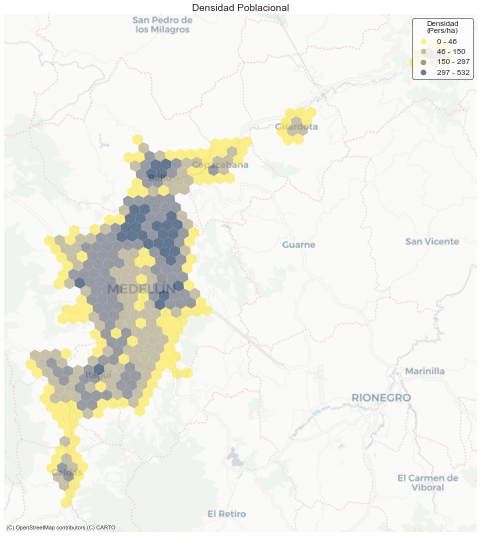

C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\env_pyomu2\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


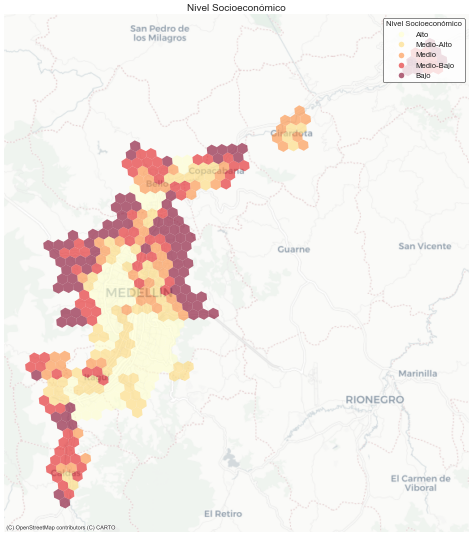

<Figure size 640x480 with 0 Axes>

In [29]:
pyomu.vizuals.print_density_nse(hexs, 
                        population=population,
                        current_path = current_path, 
                        city=city)

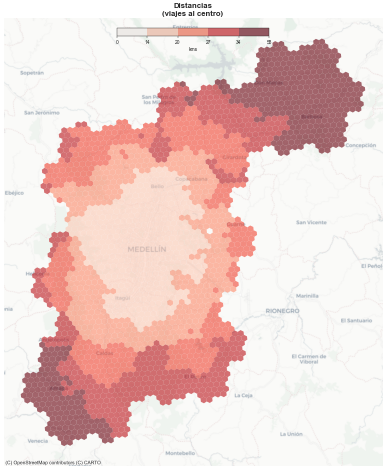

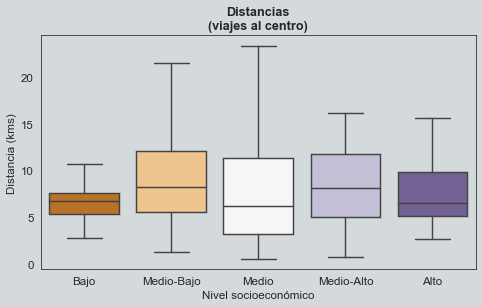

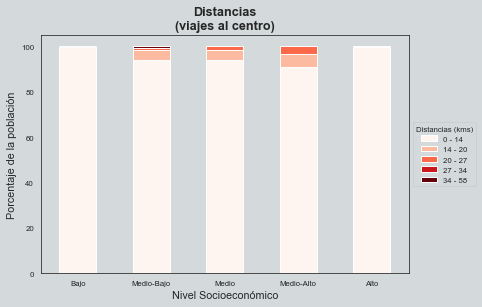

<Figure size 640x480 with 0 Axes>

In [36]:
od_matrix_avg = pyomu.vizuals.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population=population)

pyomu.vizuals.print_time_distance(
                            od_matrix_avg, 
                            population=population,
                            indicators_vars=['distance_osm_drive_downtown'],
                            colors_dict={'distance_osm_drive_downtown':'Reds'},
                            current_path=current_path, 
                            city=city)

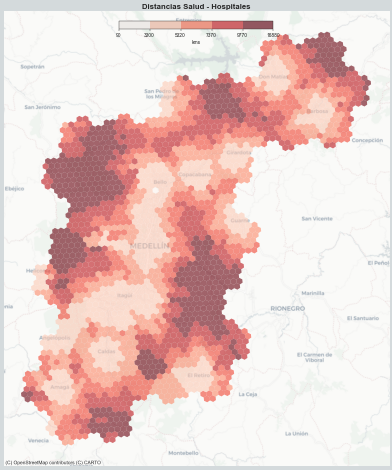

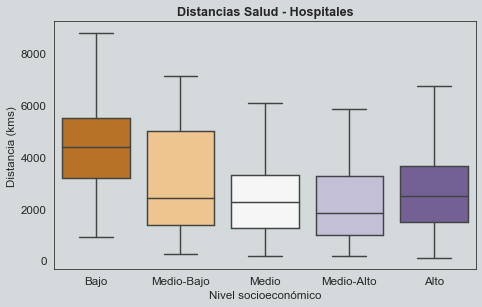

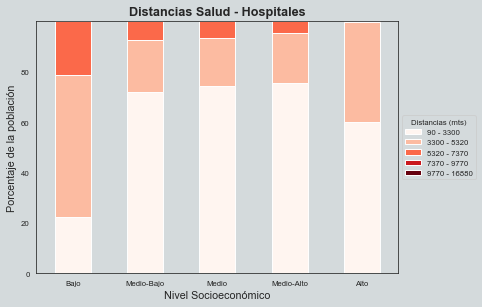

<Figure size 640x480 with 0 Axes>

In [40]:
pyomu.vizuals.print_time_distance(
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        hexs=hexs,
                        population=population,
                        indicators_vars=['distance'],
                        colors_dict={'distance':'Reds'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

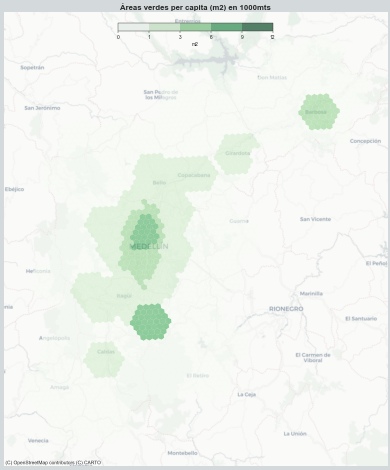

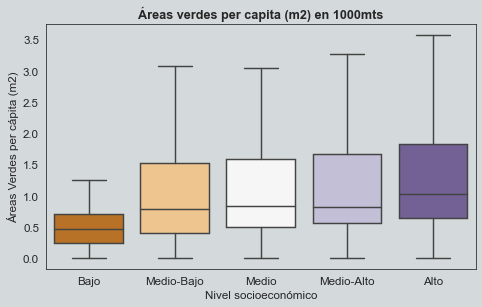

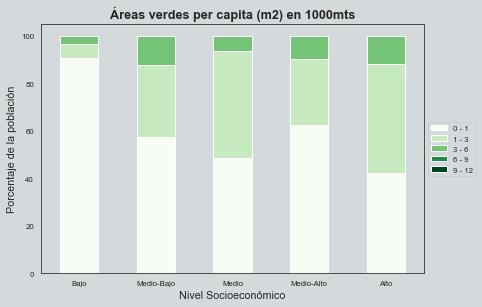

<Figure size 640x480 with 0 Axes>

In [42]:
pyomu.vizuals.print_time_distance(
                                hexs_green_space, 
                                hexs,
                                population=population,
                                indicators_vars=['green_area_m2_pcap_in_1000'],
                                colors_dict={'green_area_m2_pcap_in_1000':'Greens'},                    
                                current_path=current_path)

# Crea powerpoints

In [43]:
pyomu.vizuals.create_pptx(hexs,
                          od_matrix_all_day,
                          od_matrix,
                          od_establecimientos,                  
                          hexs_green_space,
                          population=population,
                          equipment_type=['tipo', 'oferta'],
                          current_path = current_path, 
                          city=city)


Densidad y nivel socioeconómico
Índicadores de día completo
Isocronas de tiempos y distancias
Error imprimiendo mapas de tiempos y distancias
Establecimientos

Resultados_pptx\medellin_Accesibilidad.pptx



<Figure size 640x480 with 0 Axes>